In [2]:
#Import the necessary Libraries
import sqlite3 #For database connectivity
import matplotlib.pyplot as plt #For data visualization


In [3]:
#Connect to the SQLite database
connection = sqlite3.connect('hackernews.db')
#The script connects to the SQLite database using sqlite3.connect() function, 
# providing the path and name of the SQLite database file.


In [4]:
#Execute the SQL query
cursor = connection.cursor()   #Creates a cursor Object to execute SQL queries

query = '''
SELECT
  SUBSTR(URL, INSTR(URL, '//') + 2, INSTR(SUBSTR(URL, INSTR(URL, '//') + 2), '/') - 1) AS Top_2_Websites,
  COUNT(CASE WHEN Points > 100 THEN 1 END) AS rating_abv_100
FROM
  HACKERNEWS
WHERE
  DATE([Created_At]) BETWEEN '2022-01-01' AND '2023-03-31'
  AND Points IS NOT NULL
  AND URL IS NOT NULL
  AND "Post_Type" = 'story'
GROUP BY
  Top_2_Websites
ORDER BY
  rating_abv_100 DESC
LIMIT 2
'''
cursor.execute(query) #The query retrieves the Top 2 websites based on specific conditions
data = cursor.fetchall() #Data fetched from the query result is stored in the 'data' variable


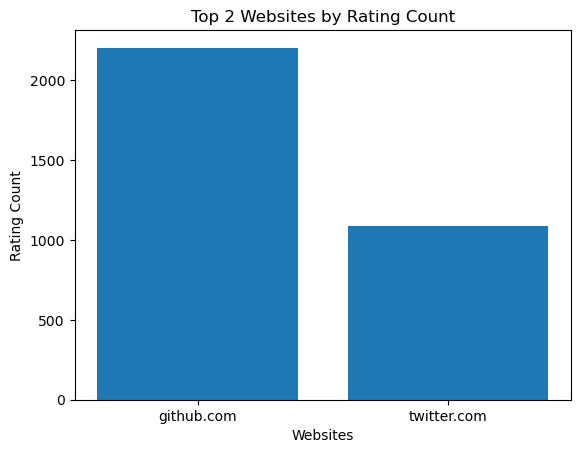

In [5]:
websites = [row[0] for row in data]
ratings = [row[1] for row in data]

plt.bar(websites, ratings)
plt.xlabel('Websites')
plt.ylabel('Rating Count')
plt.title('Top 2 Websites by Rating Count')
plt.show()


The chart above showcases the top two websites with the highest rating in the dataset.

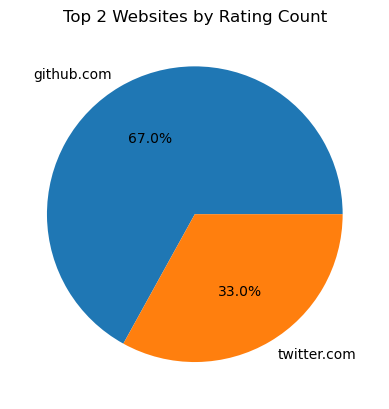

In [6]:
websites = [row[0] for row in data]
ratings = [row[1] for row in data]

plt.pie(ratings, labels=websites, autopct='%1.1f%%')
plt.title('Top 2 Websites by Rating Count')
plt.show()


The chart above presents the recommended budget allocation for each website to optimize the campaign's value.

In [7]:
connection.close()
